In [1]:
import pandas as pd
import plotnine as p

import anndata
import openTSNE
import scvi

%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = anndata.read('SCP1052.lung.counts.h5ad')

In [107]:
adata.obs.head().T

barcodekey,02-P005175-S053-R01-GTTTGGAGTATCAAGA,02-P005175-S053-R01-TGCAGTAAGCAGATAT,02-P005175-S053-R01-CCCTAACCACTACCGG,02-P005175-S053-R01-TCCGAAAAGGTATCTC,02-P005175-S053-R01-TGCACGGTCTCGGCTT
n_genes,2302,2286,1799,1276,1147
n_UMI,3874,3726,2904,1925,1742
percent_mito,1.44553,0.0536769,0.0688705,0.103896,0.229621
method,nuclei,nuclei,nuclei,nuclei,nuclei
doublet,False,False,False,False,False
predicted_celltype,lymphatic endothelial,lymphatic endothelial,lymphatic endothelial,lymphatic endothelial,lymphatic endothelial
compartment,endothelial,endothelial,endothelial,endothelial,endothelial
Cluster,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial
SubCluster,Lymphatic EC,Lymphatic EC,Lymphatic EC,Lymphatic EC,Lymphatic EC
Viral+,False,False,False,False,False


In [109]:
adata.obs['method'].value_counts()

nuclei    99735
cryo       4608
fresh      2449
Name: method, dtype: int64

In [113]:
adata.obs['source'] = adata.obs['method'].map({'nuclei': 'nuclei', 'fresh': 'cells', 'cryo': 'cells'})

In [119]:
(
    adata.obs
    .groupby(['Cluster', 'SubCluster', 'source'], observed = True)
    .size()
    .rename('count')
    .reset_index()
    .query('count > 100')
)

,Cluster,SubCluster,source,count
0,B+Plasma,B cells,nuclei,315
2,B+Plasma,Plasma cells PRDM1/BLIMP hi,nuclei,751
4,B+Plasma,Plasma cells PRDM1/BLIMP int,nuclei,466
6,B+Plasma,Plasmablasts,nuclei,121
8,Ciliated,Ciliated,nuclei,2169
10,Endothelial,Artery EC,nuclei,1767
12,Endothelial,Capillary 1,nuclei,8737
14,Endothelial,Capillary 2,nuclei,2089
16,Endothelial,Capillary Aerocytes,nuclei,3743
18,Endothelial,Doublet,nuclei,1165


In [120]:
select_celltypes = [
    'AT1', 'AT2', 'B cells', 'CD4+ T cells metabolically active', 'CD8+ T cells',
    'Inflammatory monocytes CD14hiCD16hi', 'NK cells',
    'Fibroblast', 'Myofibroblast', 'Macrophage metabolically active',
    
]

In [121]:
adata.obs['Cluster'] = adata.obs['Cluster'].pipe(np.array)
adata.obs['SubCluster'] = adata.obs['SubCluster'].pipe(np.array)

In [122]:
select_genes = [
    'SFTPC', 'DLG2', 'MS4A1', 'CD3E', 'CD8A', 'CD14', 'NCAM1', 'RYR1', 'ACTG1', 'CD163',
    'KRT7', 'STAT1', 'IFI16', 'SFTPD', 'SFTPB', 'CXCL2'
]

len(select_genes)

16

In [123]:
len(set(select_genes))

16

In [124]:
adata[:, select_genes]

View of AnnData object with n_obs × n_vars = 106792 × 16
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'CXCL2', 'SFTPC', 'DLG2', 'MS4A1', 'CD3E', 'CD8A', 'CD14', 'NCAM1', 'RYR1', 'ACTG1', 'CD163', 'KRT7', 'STAT1', 'IFI16', 'SFTPD', 'SFTPB', 'source'
    var: 'featureid'
    uns: 'Cluster_colors', 'Nuc-Cell_colors', 'SubCluster_colors', 'W_harmony', 'genome', 'harmony_knn_distances', 'harmony_knn_indices', 'manual_coarse_annotation_colors', 'method_colors', 'modality', 'neighbors', 'pca', 'predictions_colors', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background'
    varm: 'PCs', 'de_res'
    layers: 'counts', 'winsorized'

In [125]:
for gene in select_genes:
    adata.obs[gene] = adata[:, gene].X.todense()

In [126]:
adata.obs.query('SubCluster in @select_celltypes')

,n_genes,n_UMI,percent_mito,method,doublet,predicted_celltype,compartment,Cluster,SubCluster,Viral+,...,NCAM1,RYR1,ACTG1,CD163,KRT7,STAT1,IFI16,SFTPD,SFTPB,source
barcodekey,,,,,,,,,,,,,,,,,,,,,
02-P005175-S053-R01-TTTACCAAGGTGAGCT,1265,1880,0.159574,nuclei,False,vascular endothelial,endothelial,Fibroblasts,Fibroblast,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,nuclei
02-P005175-S053-R01-GCCCAGATCATTGAGC,635,841,1.664685,nuclei,False,vascular endothelial,endothelial,Fibroblasts,Fibroblast,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nuclei
02-P005175-S053-R01-GGTAACTAGTCCTACA,5885,18396,3.169167,nuclei,False,AT1,epithelial,Epithelial,AT1,False,...,3.0,0.0,31.0,0.0,62.0,6.0,0.0,5.0,223.0,nuclei
02-P005175-S053-R01-TGCTGAAGTAAGGCTG,5222,13629,2.795510,nuclei,False,AT1,epithelial,Epithelial,AT1,False,...,1.0,0.0,8.0,0.0,32.0,6.0,2.0,1.0,142.0,nuclei
02-P005175-S053-R01-TACCCGTTCACCTGTC,4576,13148,1.893824,nuclei,False,AT1,epithelial,Epithelial,AT1,False,...,0.0,0.0,4.0,0.0,26.0,3.0,1.0,4.0,74.0,nuclei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04-P006354-S057-R02-GGCAATTGTGACGGTA,447,836,17.105263,cryo,False,NaN,nan,Epithelial,AT2,False,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,cells
04-P006354-S057-R02-GTCCTCATCCTCGCAT,473,805,19.503106,cryo,False,NaN,nan,Epithelial,AT2,False,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,cells
04-P006354-S057-R02-CCTAAAGTCTAGCACA,255,406,19.211823,cryo,False,NaN,nan,Epithelial,AT2,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,cells


In [127]:
adata.obs.query('SubCluster in @select_celltypes')['SubCluster'].value_counts()

Fibroblast                             15122
AT2                                    11101
AT1                                     5946
Inflammatory monocytes CD14hiCD16hi     3273
Myofibroblast                           3068
Macrophage metabolically active         2783
CD8+ T cells                            1522
CD4+ T cells metabolically active       1396
NK cells                                 482
B cells                                  315
Name: SubCluster, dtype: int64

In [128]:
sobs = adata.obs.query('SubCluster in @select_celltypes').groupby(['SubCluster']).sample(300).copy()

In [129]:
sobs.columns

Index(['n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet',
       'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+',
       'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'CXCL2', 'SFTPC',
       'DLG2', 'MS4A1', 'CD3E', 'CD8A', 'CD14', 'NCAM1', 'RYR1', 'ACTG1',
       'CD163', 'KRT7', 'STAT1', 'IFI16', 'SFTPD', 'SFTPB', 'source'],
      dtype='object')

In [130]:
sobs

,n_genes,n_UMI,percent_mito,method,doublet,predicted_celltype,compartment,Cluster,SubCluster,Viral+,...,NCAM1,RYR1,ACTG1,CD163,KRT7,STAT1,IFI16,SFTPD,SFTPB,source
barcodekey,,,,,,,,,,,,,,,,,,,,,
02-P240970-S008-R01-TAGACTGTCGTCCTTG,2129,4210,0.000000,nuclei,False,AT1,epithelial,Epithelial,AT1,False,...,0.0,0.0,0.0,0.0,2.0,6.0,0.0,2.0,120.0,nuclei
12-P852049-S007-R01-CAAGCTACAGAATTCC,2246,4500,2.155556,nuclei,False,AT1,epithelial,Epithelial,AT1,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.0,nuclei
12-P890292-S007-R01-CGAAGGATCTCTGCCA,1880,2934,0.170416,nuclei,False,AT1,epithelial,Epithelial,AT1,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,nuclei
02-P240970-S008-R01-TCCAGAAAGTGCGCTC,590,771,0.000000,nuclei,False,AT1,epithelial,Epithelial,AT1,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,nuclei
02-P240970-S008-R01-TGCAGTAGTAGGTACG,690,1044,1.819923,nuclei,False,AT1,epithelial,Epithelial,AT1,False,...,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,13.0,nuclei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-P230638-S005-R01-TTACGCCAGACGATAT,477,570,0.000000,nuclei,False,NK cell,lymphoid,T+NK,NK cells,False,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,nuclei
02-P348762-S056-R01-CCTGTTGCAATGCTCA,587,760,1.184211,nuclei,False,NK cell,lymphoid,T+NK,NK cells,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nuclei
12-P230638-S005-R01-CTAGACACACAACATC,572,737,0.000000,nuclei,False,CD8+ T cell,lymphoid,T+NK,NK cells,False,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,nuclei


In [131]:
ls

'210419 Fit scVI model.ipynb'
'210424 Simulate counts.ipynb'
'210524 Some example genes for linear regression.ipynb'
 SCP1052.lung.counts.2021-05-25T02:01:56.h5ad
 SCP1052.lung.counts.2021-05-25T02:01:56.model/
 SCP1052.lung.counts.h5ad
 SCP1052.lung.example.csv
 library_sizes.csv


In [132]:
sobs.to_csv('SCP1052.lung.example.csv')

In [92]:
sobs.columns

Index(['n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet',
       'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+',
       'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'CXCL2', 'SFTPC',
       'DLG2', 'MS4A1', 'CD3E', 'CD8A', 'CD14', 'NCAM1', 'RYR1', 'ACTG1',
       'CD163', 'KRT7', 'STAT1', 'IFI16', 'SFTPD', 'SFTPB'],
      dtype='object')

In [133]:
sobs_long = sobs.reset_index().melt(
    id_vars = ['barcodekey', 'SubCluster', 'n_UMI', 'donor', 'disease', 'source'],
    value_vars = select_genes,
    var_name = 'gene',
    value_name = 'count'
)

sobs_long

,barcodekey,SubCluster,n_UMI,donor,disease,source,gene,count
0,02-P240970-S008-R01-TAGACTGTCGTCCTTG,AT1,4210,D4,COVID-19,nuclei,SFTPC,0.0
1,12-P852049-S007-R01-CAAGCTACAGAATTCC,AT1,4500,D16,COVID-19,nuclei,SFTPC,0.0
2,12-P890292-S007-R01-CGAAGGATCTCTGCCA,AT1,2934,D17,COVID-19,nuclei,SFTPC,0.0
3,02-P240970-S008-R01-TCCAGAAAGTGCGCTC,AT1,771,D4,COVID-19,nuclei,SFTPC,0.0
4,02-P240970-S008-R01-TGCAGTAGTAGGTACG,AT1,1044,D4,COVID-19,nuclei,SFTPC,0.0
...,...,...,...,...,...,...,...,...
47995,12-P230638-S005-R01-TTACGCCAGACGATAT,NK cells,570,D13,COVID-19,nuclei,CXCL2,0.0
47996,02-P348762-S056-R01-CCTGTTGCAATGCTCA,NK cells,760,D7,COVID-19,nuclei,CXCL2,0.0
47997,12-P230638-S005-R01-CTAGACACACAACATC,NK cells,737,D13,COVID-19,nuclei,CXCL2,0.0
47998,12-P485759-S008-R01-CTCAATTAGCCTAGGA,NK cells,542,D14,COVID-19,nuclei,CXCL2,0.0


In [134]:
sobs_long['gene'] = sobs_long['gene'].pipe(pd.Categorical, categories = select_genes)
sobs_long['SubCluster'] = sobs_long['SubCluster'].pipe(pd.Categorical, categories = select_celltypes)

In [142]:
short_names = {
    'AT1': 'AT1',
    'AT2': 'AT2',
    'B cells': 'B',
    'CD4+ T cells metabolically active': 'CD4+T',
    'CD8+ T cells': 'CD8+T',
    'Inflammatory monocytes CD14hiCD16hi': 'Mon',
    'NK cells': 'NK',
    'Fibroblast': 'Fib',
    'Myofibroblast': 'Myof',
    'Macrophage metabolically active': 'Mac'
}

sobs_long['short_name'] = sobs_long['SubCluster'].map(short_names)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


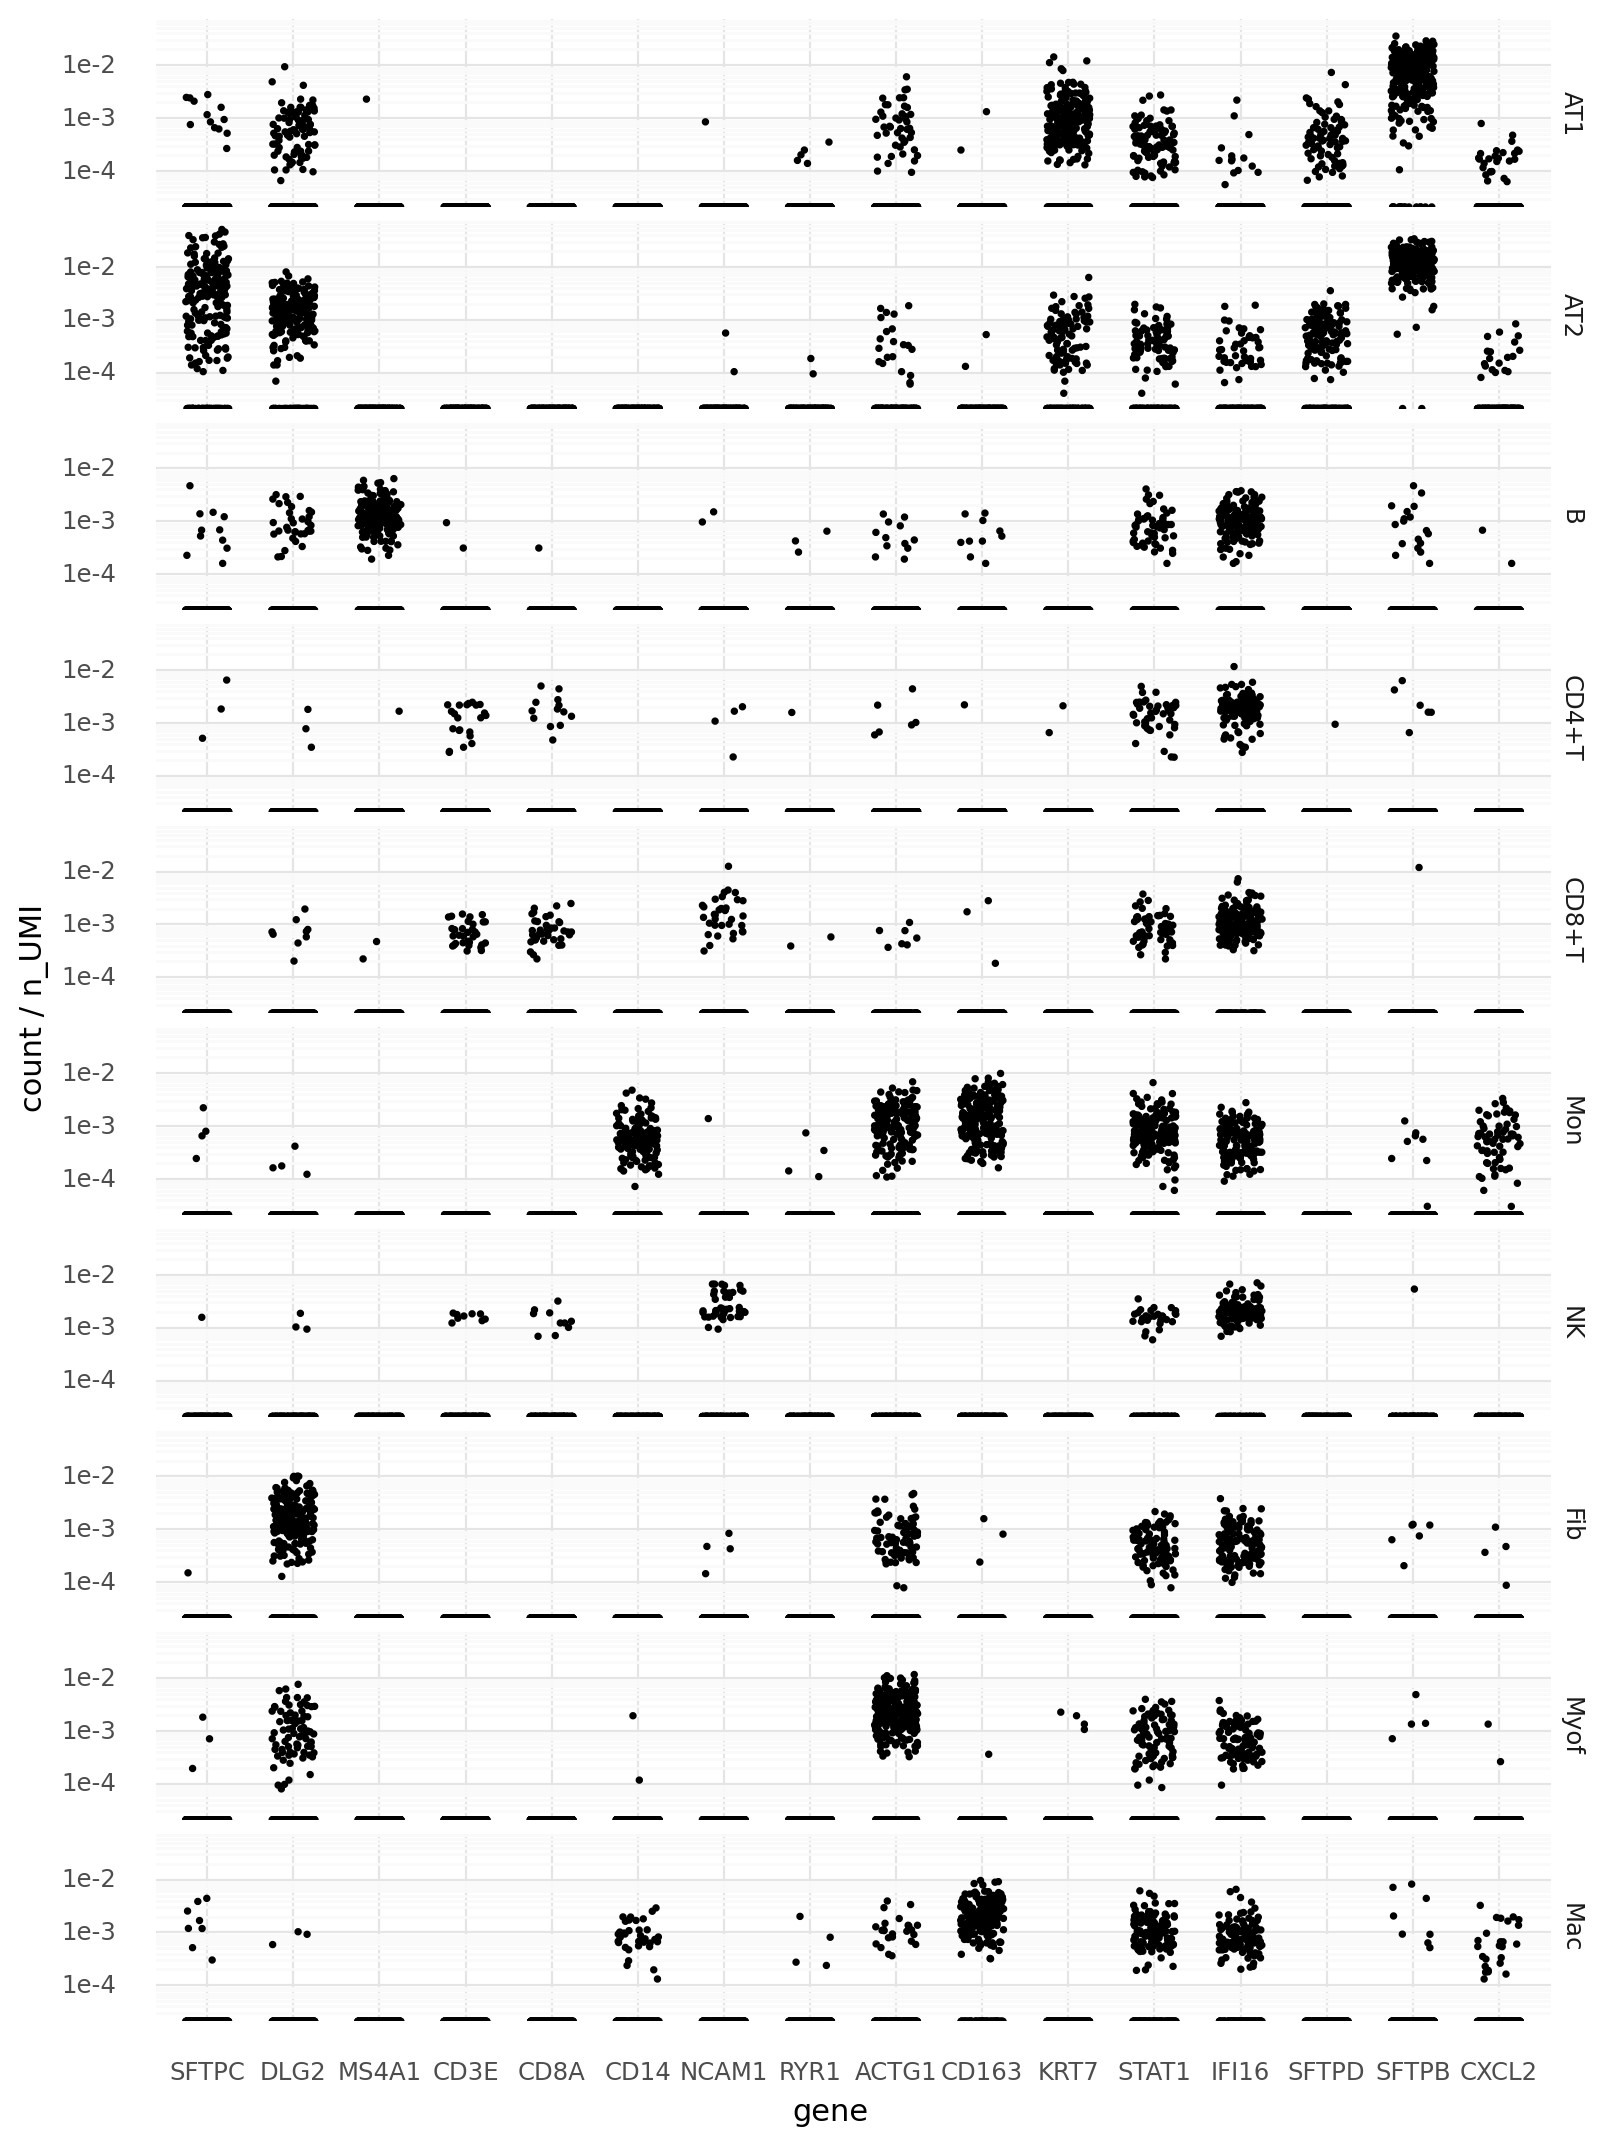

<ggplot: (8754664723342)>

In [143]:
p.options.figure_size = 9, 13

(
    p.ggplot(p.aes(x = 'gene', y = 'count / n_UMI'), sobs_long)
    + p.geom_jitter(height = 0, shape = '.', width = 0.25)
    + p.scale_y_log10()
    + p.theme_minimal()
    + p.facet_grid('short_name ~ .')
)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


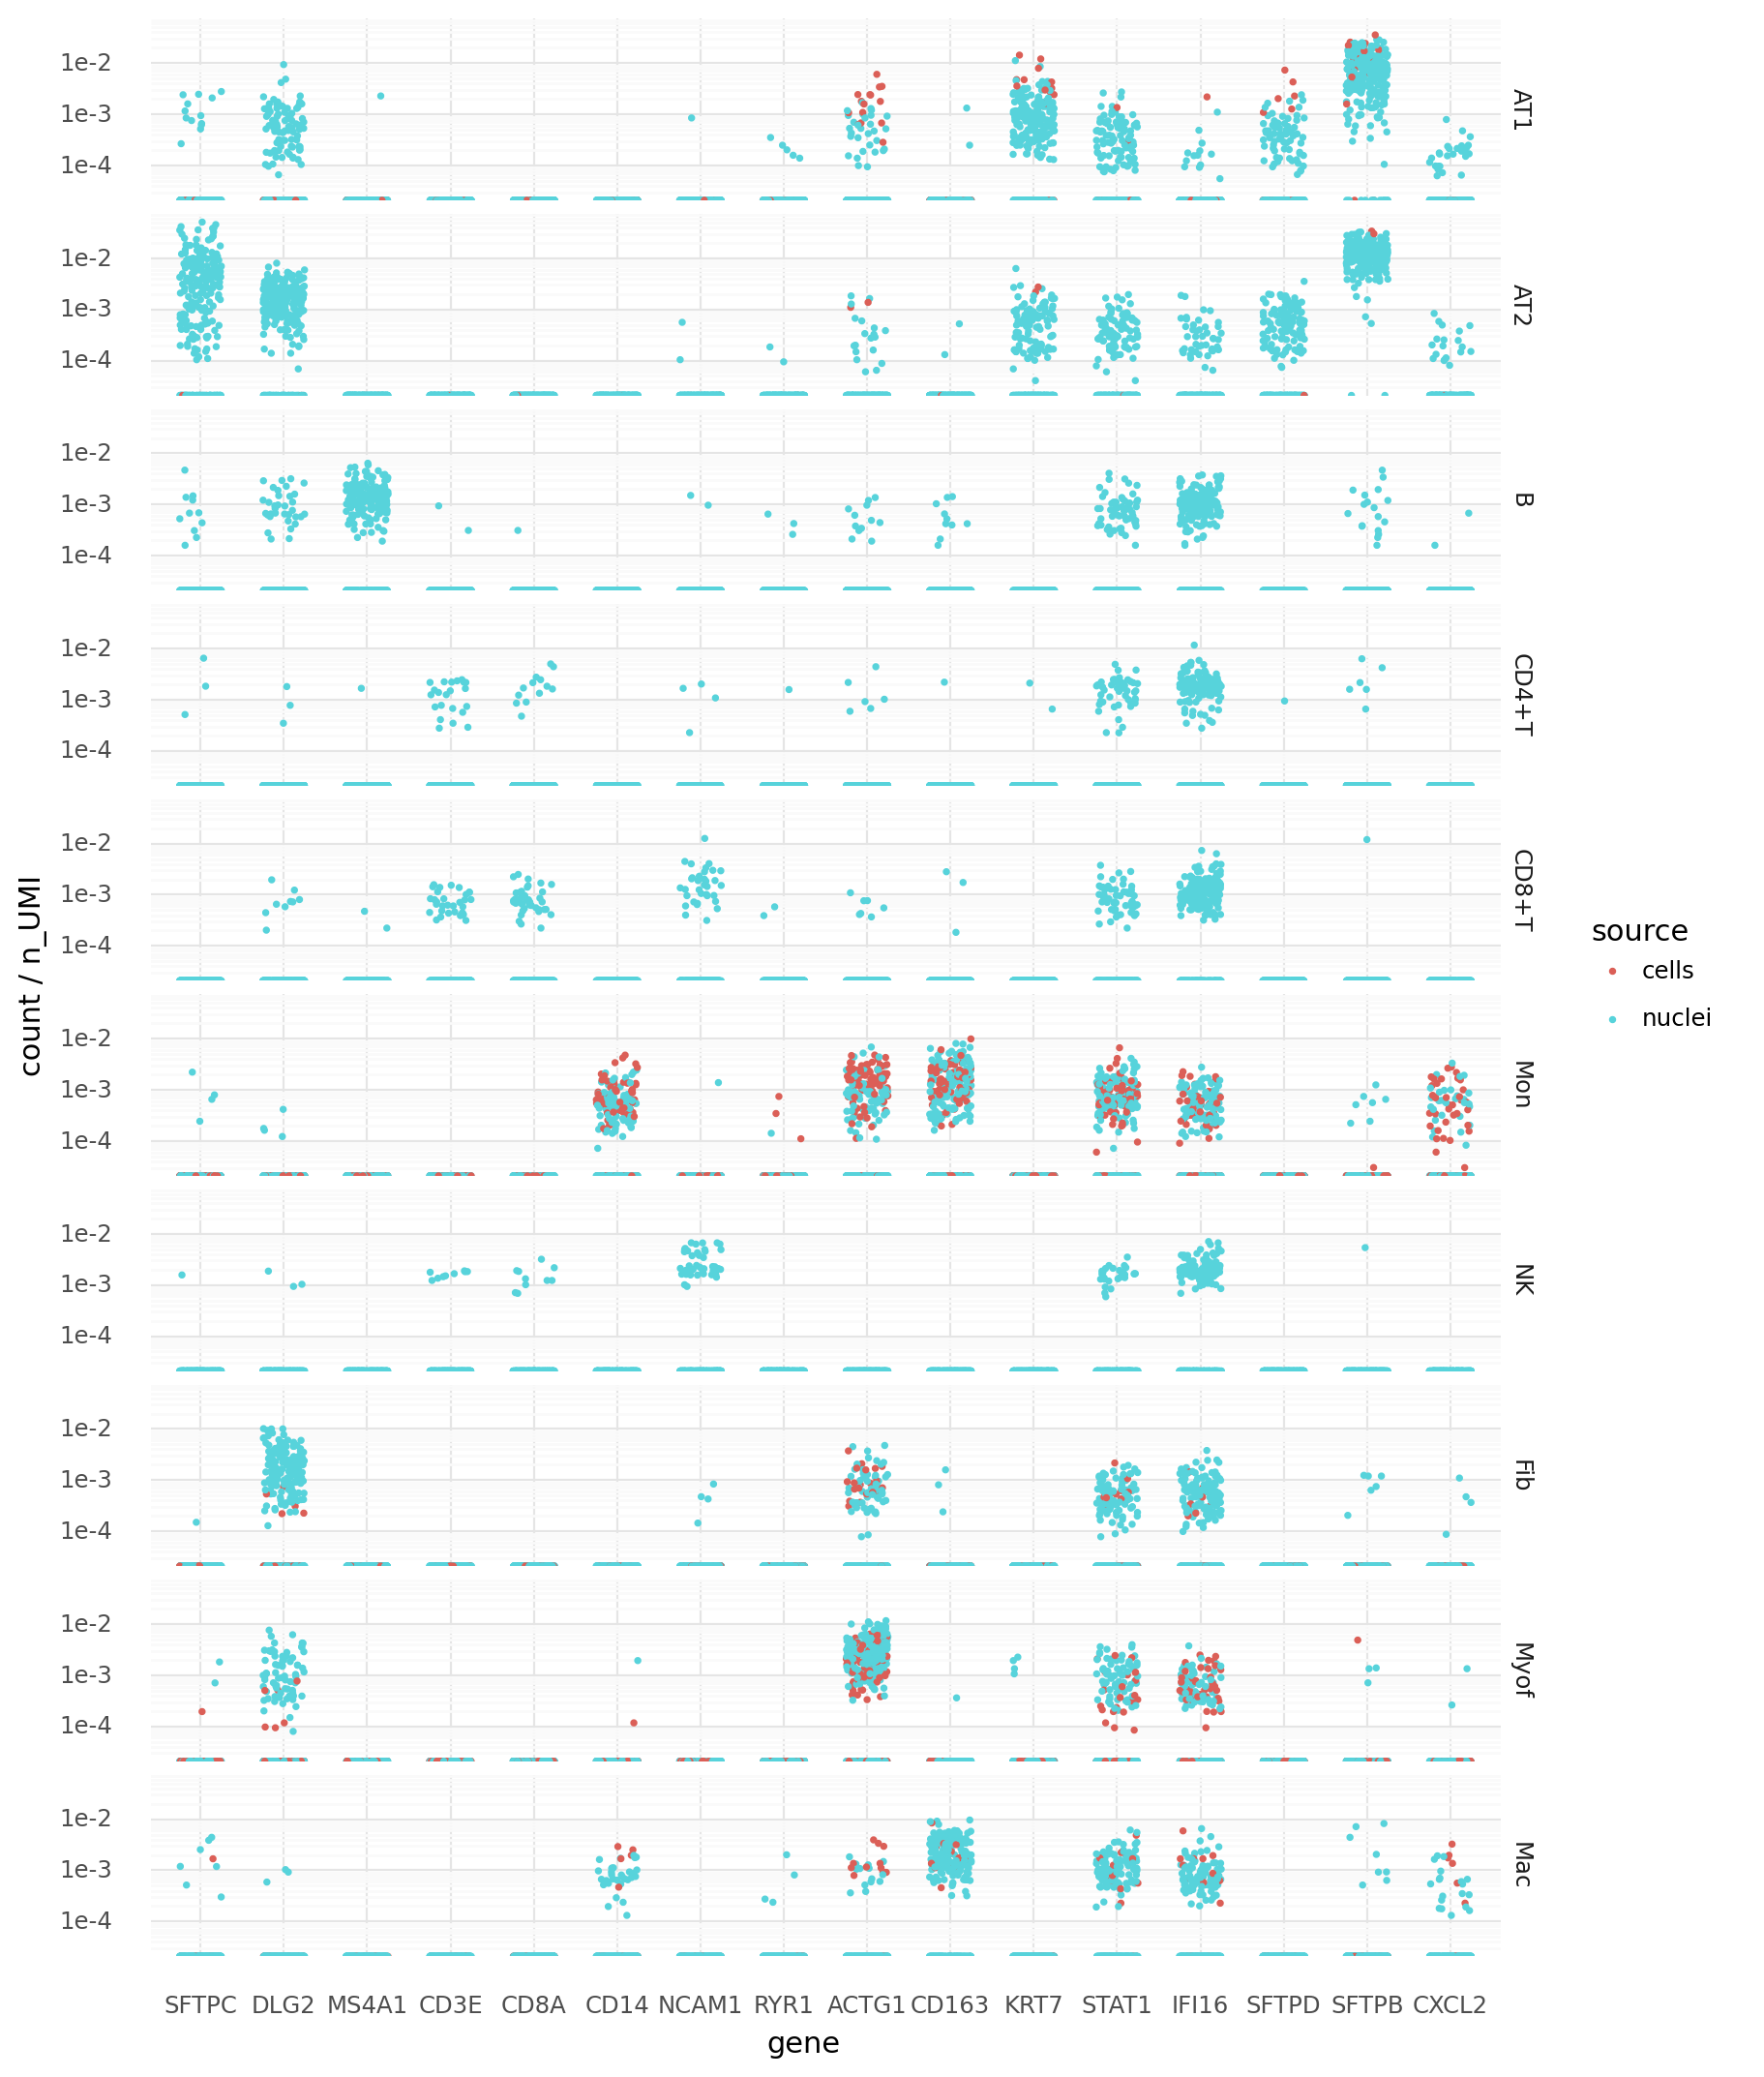

<ggplot: (8754686995213)>

In [144]:
p.options.figure_size = 9, 13

(
    p.ggplot(p.aes(x = 'gene', y = 'count / n_UMI', color = 'source'), sobs_long)
    + p.geom_jitter(height = 0, shape = '.', width = 0.25)
    + p.scale_y_log10()
    + p.theme_minimal()
    + p.facet_grid('short_name ~ .')
)

In [145]:
ls

'210419 Fit scVI model.ipynb'
'210424 Simulate counts.ipynb'
'210524 Some example genes for linear regression.ipynb'
 SCP1052.lung.counts.2021-05-25T02:01:56.h5ad
 SCP1052.lung.counts.2021-05-25T02:01:56.model/
 SCP1052.lung.counts.h5ad
 SCP1052.lung.example.csv
 library_sizes.csv


In [146]:
sobs_long.to_csv('SCP1052.lung.example.long.csv')

In [147]:
sobs_long['short_name'].cat.categories

Index(['AT1', 'AT2', 'B', 'CD4+T', 'CD8+T', 'Mon', 'NK', 'Fib', 'Myof', 'Mac'], dtype='object')